In [1]:


import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
from pandas import (DataFrame, date_range)

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]) \
    .stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

In [3]:
factor

date         
2015-01-15  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-16  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-17  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-18  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-19  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-20  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-21  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-22  A    3.0
            D    1.0
                ... 
2015-02-06  C    2.0
            D    1.0
2015-02-07  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-02-08  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-02-09  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-02-10  A    3.0
            B    4.0

In [4]:
prices

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0
2015-01-15,1.015094,1.030378,1.0,0.970373,1.030378,1.0
2015-01-16,1.017632,1.035529,1.0,0.965521,1.035529,1.0
2015-01-17,1.020176,1.040707,1.0,0.960693,1.040707,1.0
2015-01-18,1.022726,1.045911,1.0,0.955890,1.045911,1.0


In [5]:
factor_groups

{'A': 'Group1',
 'B': 'Group2',
 'C': 'Group1',
 'D': 'Group2',
 'E': 'Group1',
 'F': 'Group2'}

In [6]:
factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 3), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [13]:
type(factor_data.index.levels)


pandas.core.base.FrozenList

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1D,3D
Ann. alpha,0.762,0.766
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),50.000,50.000
Mean Period Wise Return Bottom Quantile (bps),-50.000,-50.000
Mean Period Wise Spread (bps),100.000,100.000


c:\users\administrator\anaconda2\lib\site-packages\pandas\tseries\index.py:817: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


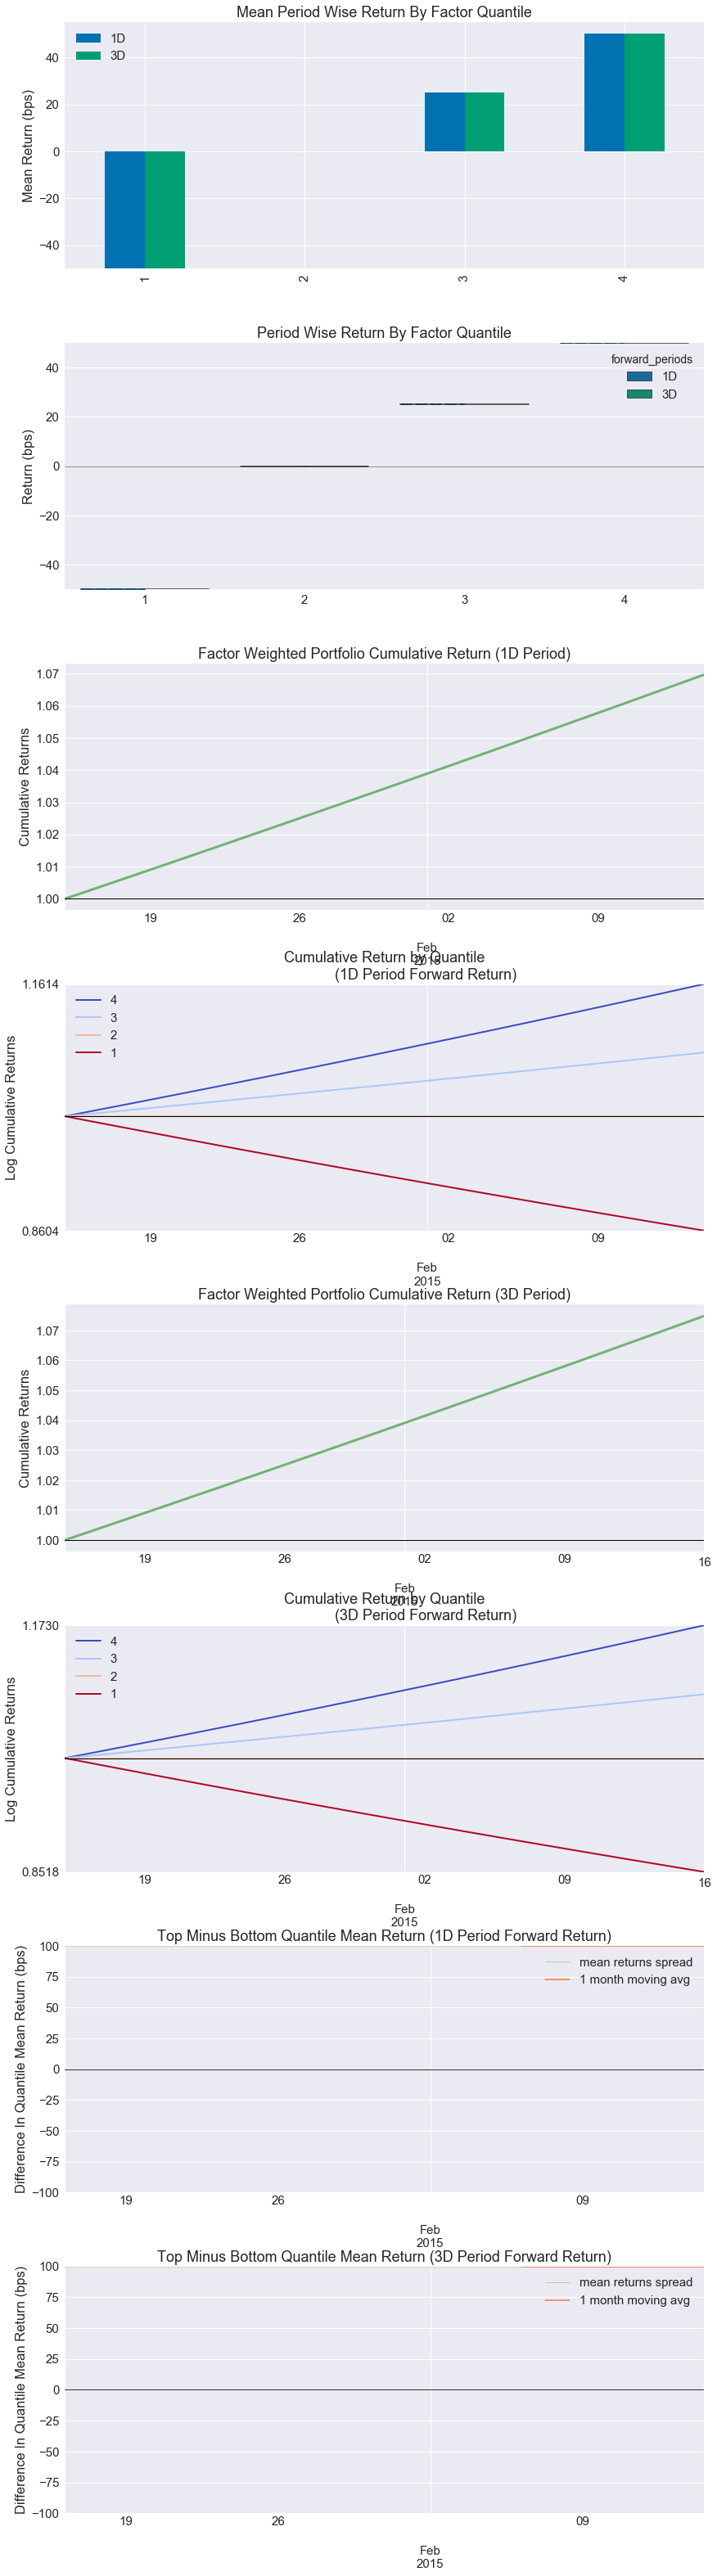

Information Analysis


c:\users\administrator\anaconda2\lib\site-packages\pandas\core\series.py:1342: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


,1D,3D
IC Mean,1.000000,1.000000
IC Std.,0.000000,0.000000
Risk-Adjusted IC,inf,inf
t-stat(IC),inf,inf
p-value(IC),0.000000,0.000000
IC Skew,0.000000,0.000000
IC Kurtosis,-3.000000,-3.000000


c:\users\administrator\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
c:\users\administrator\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\administrator\anaconda2\lib\site-packages\statsmodels\graphics\gofplots.py:183: RuntimeWarning: invalid value encountered in divide
  return (self.sorted_data-self.loc)/self.scale


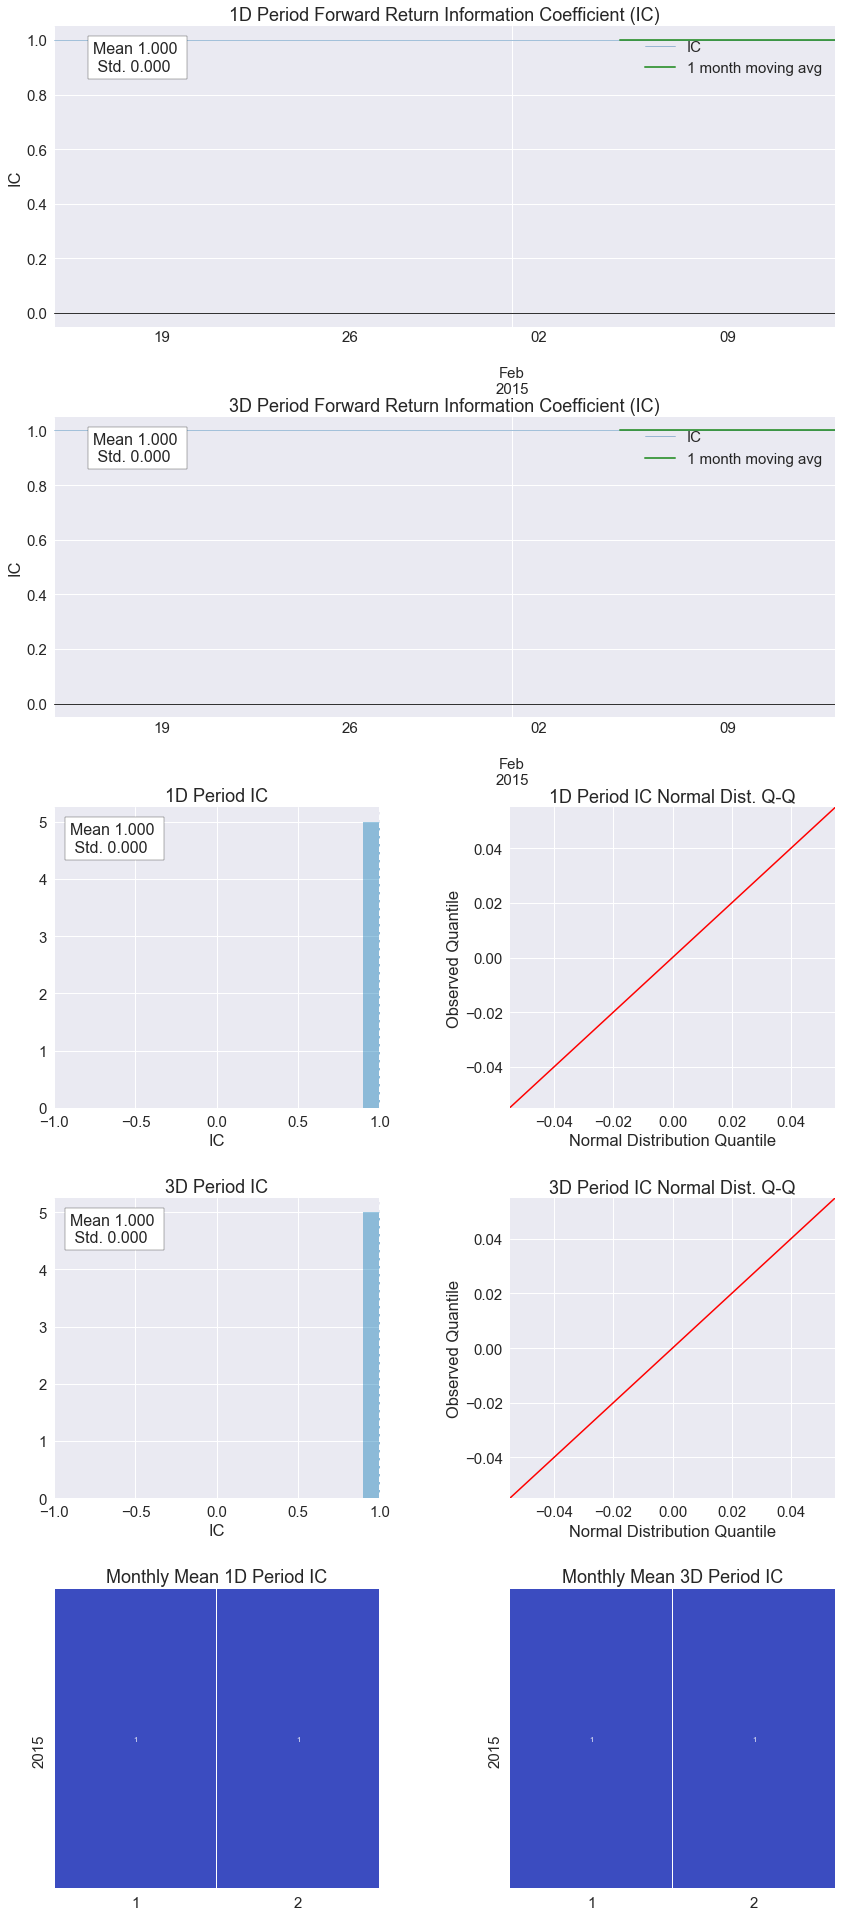

Turnover Analysis


,1D,3D
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1D,3D
Mean Factor Rank Autocorrelation,1.0,1.0


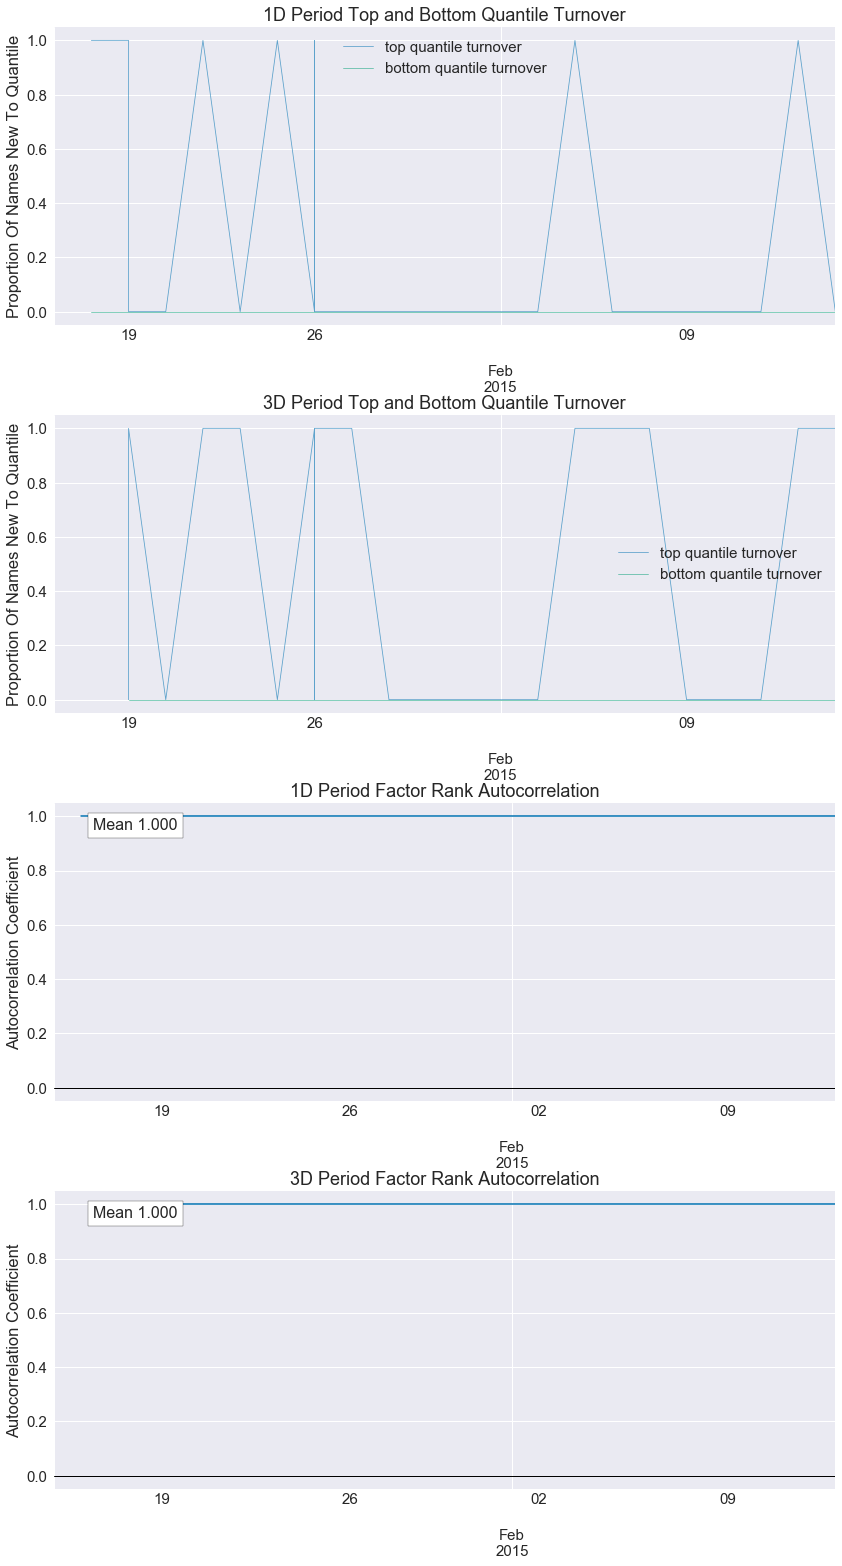

In [8]:
res = create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

In [9]:
res

In [10]:
# create artificial intraday prices

today_open = base_prices.copy()
today_open.index += pd.Timedelta('9h30m')

# every day, after 1 hour from open all stocks increase by 0.1%
today_open_1h = today_open.copy()
today_open_1h.index += pd.Timedelta('1h')
today_open_1h += today_open_1h*0.001

# every day, after 3 hours from open all stocks decrease by 0.2%
today_open_3h = today_open.copy()
today_open_3h.index += pd.Timedelta('3h')
today_open_3h -= today_open_3h*0.002

# prices DataFrame will contain all intraday prices
prices = pd.concat([today_open, today_open_1h, today_open_3h]).sort_index()

NameError: name 'base_prices' is not defined

In [22]:
#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'

event = DataFrame(index=factor_index, columns=tickers,
                   data=[[1, nan, nan, nan, nan, nan],
                         [4, nan, nan, 7, nan, nan],
                         [nan, nan, nan, nan, nan, nan],
                         [nan, 3, nan, 2, nan, nan],
                         [1, nan, nan, nan, nan, nan],
                         [nan, nan, 2, nan, nan, nan],
                         [nan, nan, nan, 2, nan, nan],
                         [nan, nan, nan, 1, nan, nan],
                         [2, nan, nan, nan, nan, nan],
                         [nan, nan, nan, nan, 5, nan],
                         [nan, nan, nan, 2, nan, nan],
                         [nan, nan, nan, nan, nan, nan],
                         [2, nan, nan, nan, nan, nan],
                         [nan, nan, nan, nan, nan, 5],
                         [nan, nan, nan, 1, nan, nan],
                         [nan, nan, nan, nan, 4, nan],
                         [5, nan, nan, 4, nan, nan],
                         [nan, nan, nan, 3, nan, nan],
                         [nan, nan, nan, 4, nan, nan],
                         [nan, nan, 2, nan, nan, nan],
                         [5, nan, nan, nan, nan, nan],
                         [nan, 1, nan, nan, nan, nan],
                         [nan, nan, nan, nan, 4, nan],
                         [0, nan, nan, nan, nan, nan],
                         [nan, 5, nan, nan, nan, 4],
                         [nan, nan, nan, nan, nan, nan],
                         [nan, nan, 5, nan, nan, 3],
                         [nan, nan, 1, 2, 3, nan],
                         [nan, nan, nan, 5, nan, nan],
                         [nan, nan, 1, nan, 3, nan]]).stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

In [15]:
# factor_data = get_clean_factor_and_forward_returns(
#     factor,
#     prices,
#     groupby=factor_groups,
#     quantiles=4,
#     periods=(1, 2, 3, 6), 
#     filter_zscore=None)

In [17]:
create_event_study_tear_sheet(event_data, prices, avgretplot=(5, 10))



NameError: name 'event_data' is not defined

In [18]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

NameError: name 'factor_data' is not defined

In [23]:
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

NameError: name 'factor_data' is not defined

In [16]:
event_data = get_clean_factor_and_forward_returns(event, prices,
                                                  quantiles=None, bins=1,
                                                  periods=(1, 2, 3, 4, 5, 10, 15), filter_zscore=None)

ValueError: Factor and prices indices don't match: make sure they have the same convention in terms of datetimes and symbol-names